# Tratamento de Dados 1

## Dados sobre o percentual de pessoas próximas da rede de transporte de média e alta capacidade (PNT) 

Arquivo: [proporcao_pessoas_proximas_pnt](https://basedosdados.org/dataset/br-mobilidados-indicadores?bdm_table=proporcao_pessoas_proximas_pnt)

In [109]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("datasets/proporcao_pessoas_proximas_pnt.csv")

In [3]:
dataset.head()

,ano,sigla_uf,id_municipio,indicador,prop_pessoas_proximas_pnt
0,2010,PA,1501402,PNT Geral,0
1,2010,PA,1501402,PNT 0 1/2,0
2,2010,PA,1501402,PNT 1/2 1,0
3,2010,PA,1501402,PNT 1 3,0
4,2010,PA,1501402,PNT 3 mais,0


In [6]:
# HashMap de estados por região
regioes = {"Norte": {"PA"},
           "Nordeste": {"CE", "PE", "BA"},
           "Sudeste": {"MG", "RJ", "SP"},
           "Centro-Oeste": {"DF"},
           "Sul": {"PR"}}

##### Obervação
Vale ressaltar que as regiões Sudeste e Nordeste são as únicas que possuem mais de um estado para representar sua região. Isso pode indicar que suas médias são as mais condizentes com a realidade, ao contrário das outras regiões.

In [12]:
def get_media_prop_by_regiao(regiao, indicador, ano=2019):
    """
    :param regiao: região a ser selecionada
    :param indicador: indicador a ser selecionado
    :param ano: ano a ser selecionado
    :return: média do percentual de pessoas próximas a redes de transporte
    """
    media = dataset[(dataset["ano"] == ano) & (dataset["indicador"] == indicador) &
                    (dataset["sigla_uf"].isin(regioes[regiao]))]["prop_pessoas_proximas_pnt"].mean()
    return media

In [164]:
def get_dvp_prop_by_regiao(regiao, indicador, ano=2019):
    """
    :param regiao: região a ser selecionada
    :param indicador: indicador a ser selecionado
    :param ano: ano a ser selecionado
    :return: desvio padrão do percentual de pessoas próximas a redes de transporte
    """
    media = dataset[(dataset["ano"] == ano) & (dataset["indicador"] == indicador) &
                    (dataset["sigla_uf"].isin(regioes[regiao]))]["prop_pessoas_proximas_pnt"].std()
    return media

### Analisando a média da porcentagem geral das regiões entre 2010 e 2019

In [162]:
periodo = range(2010, 2020)
medias_regiao = [get_media_prop_by_regiao(regiao, "PNT Geral", ano) 
                 for ano in periodo
                 for regiao in regioes]
df1 = pd.DataFrame(np.array(medias_regiao).reshape(10, 5),
                   index=periodo, columns=regioes)
df1.index.name, df1.columns.name = "ano", "estados"
df1

estados,Norte,Nordeste,Sudeste,Centro-Oeste,Sul
ano,,,,,
2010,0.0,3.333333,14.666667,9.0,31.0
2011,0.0,3.333333,14.666667,9.0,31.0
2012,0.0,3.333333,15.333333,9.0,32.0
2013,0.0,3.333333,15.666667,9.0,32.0
2014,0.0,6.333333,21.000000,9.0,32.0
2015,0.0,7.000000,21.000000,9.0,32.0
2016,0.0,7.000000,22.333333,9.0,32.0
2017,4.0,10.333333,22.333333,10.0,32.0
2018,8.0,11.000000,22.333333,10.0,32.0


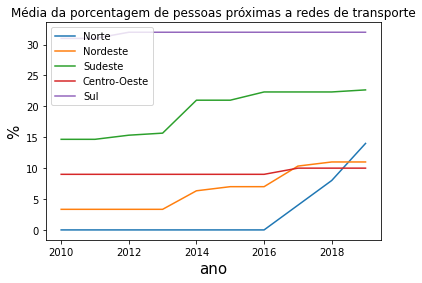

In [161]:
plt.plot(df1)
plt.title("Média da porcentagem de pessoas próximas a redes de transporte")
plt.xlabel("ano", size=15)
plt.ylabel("%", size=15)
plt.legend(regioes, loc="upper left")
plt.show()

#### Norte
É possível notar que a região Norte é a que possui o pior acesso à redes de Transporte. Sua média somente cresce a partir de 2017 e ultrapassa a região Nordeste em 2019, podendo ser um sinal de melhora repentina.
#### Nordeste
A região Nordeste, no ano de 2010, possui a segunda pior média de acesso à redes de transporte. A média cresce a partir de 2014, porém continua sendo a segunda pior média.
#### Sudeste
Assim como a região Nordeste, ela passa a crescer a partir de 2014 e se mantém estável até 2019.
#### Centro-Oeste
A região Nordeste é a terceita pior entre as regiões em 2010 e passa a ser a pior no ano de 2019, o que pode evidenciar um possível atraso em sua modernização em comparação com os outro estados. Essa é também uma reigão que demonstrou somente o crescimento de 1% ao longo dos 10 anos.
#### Sul
A região Sul é a que possui melhor porcentagem, porém é também uma das que demonstrou pouquísimo avanço ao longo dos 10 anos, avançando somente 1%.

### Analisando o desvio padrão geral da porcentagem entre 2010 e 2019

In [167]:
periodo = range(2010, 2020)
dvp_regiao = [get_dvp_prop_by_regiao(regiao, "PNT Geral", ano) 
                 for ano in periodo
                 for regiao in regioes]
df2 = pd.DataFrame(np.array(medias_regiao).reshape(10, 5),
                   index=periodo, columns=regioes)
df2.index.name, df1.columns.name = "ano", "estados"
df2

,Norte,Nordeste,Sudeste,Centro-Oeste,Sul
ano,,,,,
2010,NaN,5.773503,7.023769,NaN,NaN
2011,NaN,5.773503,7.023769,NaN,NaN
2012,NaN,5.773503,8.082904,NaN,NaN
2013,NaN,5.773503,8.621678,NaN,NaN
2014,NaN,9.291573,8.717798,NaN,NaN
2015,NaN,9.643651,8.717798,NaN,NaN
2016,NaN,9.643651,11.015141,NaN,NaN
2017,NaN,6.806859,11.015141,NaN,NaN
2018,NaN,6.557439,9.237604,NaN,NaN


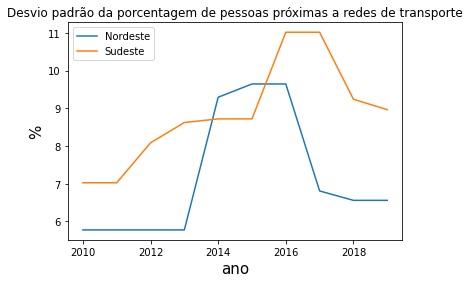

In [177]:
plt.plot(df2.loc[:, ["Nordeste", "Sudeste"]])
plt.title("Desvio padrão da porcentagem de pessoas próximas a redes de transporte")
plt.xlabel("ano", size=15)
plt.ylabel("%", size=15)
plt.legend(["Nordeste", "Sudeste"], loc="upper left")
plt.show()